In [14]:
import os
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# bai Hotel KDE & Aspect Summary

C:\Users\andyb\AppData\Local\Temp\ipykernel_15672\58313337.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


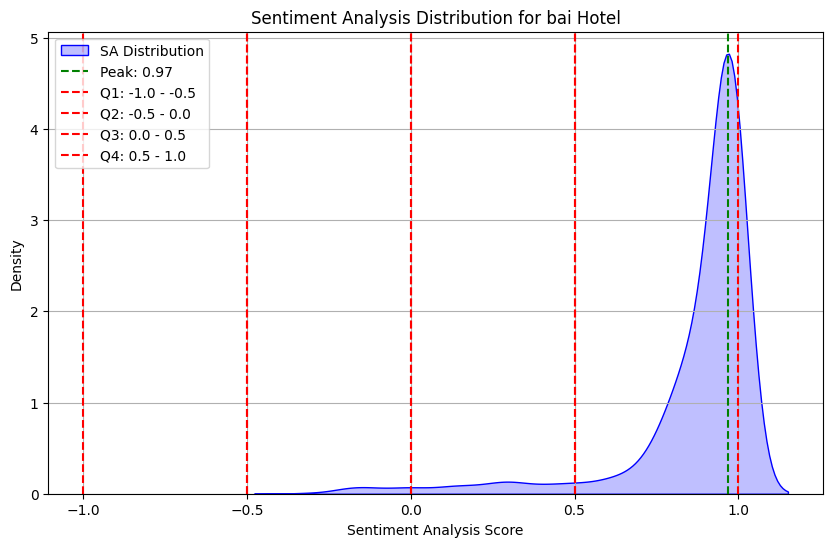

In [15]:
# Load your dataset
bai_reviews = pd.read_csv(r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\bai_hotel_predictions.csv')

# Function to compute the unified sentiment score from predicted probabilities
def calculate_sentiment_score(predicted_scores):
    # Parse the predicted_scores string into a list of floats
    scores = ast.literal_eval(predicted_scores)
    # Apply the weighted averaging formula: -1 * P(Negative) + 0 * P(Neutral) + 1 * P(Positive)
    sentiment_score = -1 * scores[0] + 0 * scores[1] + 1 * scores[2]
    return sentiment_score

# Add a new column 'SA' for Sentiment Analysis score to the dataframe
bai_reviews['SA'] = bai_reviews['predicted_scores'].apply(calculate_sentiment_score)

# Define a function to plot KDE and peak
def plot_sa_distribution(df, hotel_name):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
    plt.title(f'Sentiment Analysis Distribution for {hotel_name}')
    plt.xlabel('Sentiment Analysis Score')
    plt.ylabel('Density')

    # Calculate KDE and find peak
    kde = gaussian_kde(df['SA'])
    density_values = kde(df['SA'])
    peak_value = df['SA'][density_values.argmax()]
    plt.axvline(x=peak_value, linestyle='--', color='green', label=f'Peak: {round(peak_value, 2)}')

    # Add quartile lines
    quartile_ranges = {'Q1': (-1.0, -0.5), 'Q2': (-0.5, 0.0), 'Q3': (0.0, 0.5), 'Q4': (0.5, 1.0)}
    for label, (start, end) in quartile_ranges.items():
        plt.axvline(x=start, linestyle='--', color='red', label=f'{label}: {start} - {end}')
        plt.axvline(x=end, linestyle='--', color='red')

    plt.legend()
    plt.grid(True)
    plt.show()

    return peak_value

# Function to save the results
def save_results(hotel_name, peak_value):
    output_folder = "statistical model results"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Create a file path for saving the results
    output_filename = os.path.join(output_folder, f"{hotel_name}_results.txt")

    # Determine which quartile the peak belongs to
    quartile_ranges = {'Q1': (-1.0, -0.5), 'Q2': (-0.5, 0.0), 'Q3': (0.0, 0.5), 'Q4': (0.5, 1.0)}
    peak_quartile = None
    for label, (start, end) in quartile_ranges.items():
        if start <= peak_value <= end:
            peak_quartile = label
            break

    # Open the file in write mode and save the results
    with open(output_filename, "w") as file:
        file.write(f"{hotel_name} Peak Value: {peak_value}\n")
        file.write(f"{hotel_name} Peak Quartile Classification: {peak_quartile}\n")

# Plot KDE and peak for bai Hotel
bai_peak_value = plot_sa_distribution(bai_reviews, 'bai Hotel')

# Save the results
save_results("bai_hotel", bai_peak_value)

In [16]:
# Define the path for bai_hotel sentiment results
bai_hotel = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\1_bai_hotel\1_bai_hotel_sentiment_analysis.csv"

# Function to load and display sentiment results for a specific hotel
def load_and_display_sentiment_result(hotel_file_path):
    if os.path.exists(hotel_file_path) and hotel_file_path.endswith('_sentiment_analysis.csv'):
        # Load the CSV file into a DataFrame
        df = pd.read_csv(hotel_file_path, index_col=0)
        
        # Extract the hotel name from the file path
        hotel_name = os.path.basename(hotel_file_path).split('_sentiment_analysis.csv')[0]
        
        # Display the DataFrame
        print("\n" + "="*50 + "\n")
        print(f"Sentiment Analysis for {hotel_name}:")
        print(df)
        print("\n" + "="*50 + "\n")
    else:
        print(f"File {hotel_file_path} not found or invalid format.")

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(bai_hotel)




Sentiment Analysis for 1_bai_hotel:
                 positive  negative  positive_percent  negative_percent
food               1127.0      30.0         27.902946          0.742758
staff              1708.0      53.0         42.287695          1.312206
comfort             303.0       7.0          7.501857          0.173310
facilities          180.0       3.0          4.456549          0.074276
value for money      53.0       1.0          1.312206          0.024759




# Dusit Thani Mactan KDE & Aspect Summary

C:\Users\andyb\AppData\Local\Temp\ipykernel_15672\58313337.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


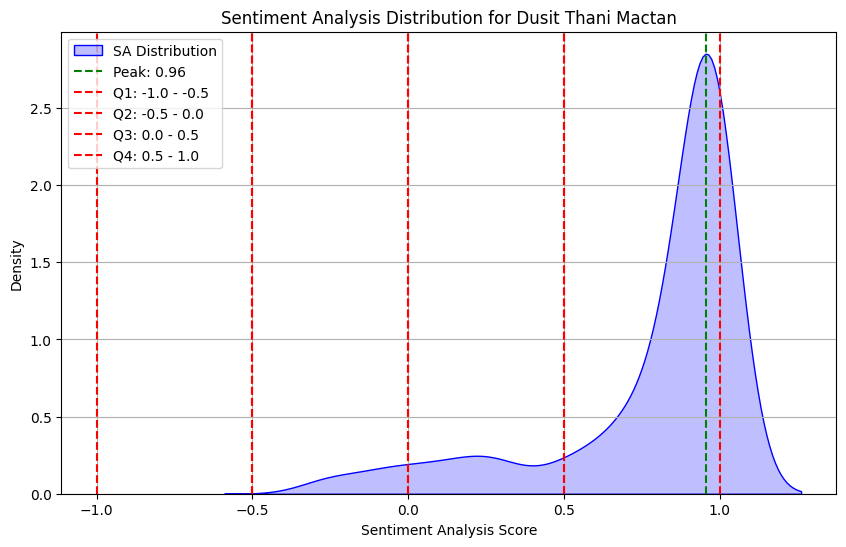

In [17]:
dusit_thani_reviews = pd.read_csv(r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\dusit_thani_mactan_predictions.csv')

# Add a new column 'SA' for Sentiment Analysis score to the dataframe
dusit_thani_reviews['SA'] = dusit_thani_reviews['predicted_scores'].apply(calculate_sentiment_score)

# Plot KDE and peak for bai Hotel
dusit_thani_peak_value = plot_sa_distribution(dusit_thani_reviews, 'Dusit Thani Mactan')

# Save the results
save_results("dusit_thani_mactan", dusit_thani_peak_value)

In [18]:
# Define the path for bai_hotel sentiment results
dusit_thani_mactan = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\2_dusit_thani_mactan\2_dusit_thani_mactan_sentiment_analysis.csv"

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(dusit_thani_mactan)



Sentiment Analysis for 2_dusit_thani_mactan:
                 positive  negative  positive_percent  negative_percent
food                554.0      37.0         29.343220          1.959746
staff               905.0      40.0         47.934322          2.118644
comfort             117.0       6.0          6.197034          0.317797
facilities          143.0       6.0          7.574153          0.317797
value for money      12.0       1.0          0.635593          0.052966




# Fairfield by Marriott Cebu KDE & Aspect summary

C:\Users\andyb\AppData\Local\Temp\ipykernel_15672\58313337.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


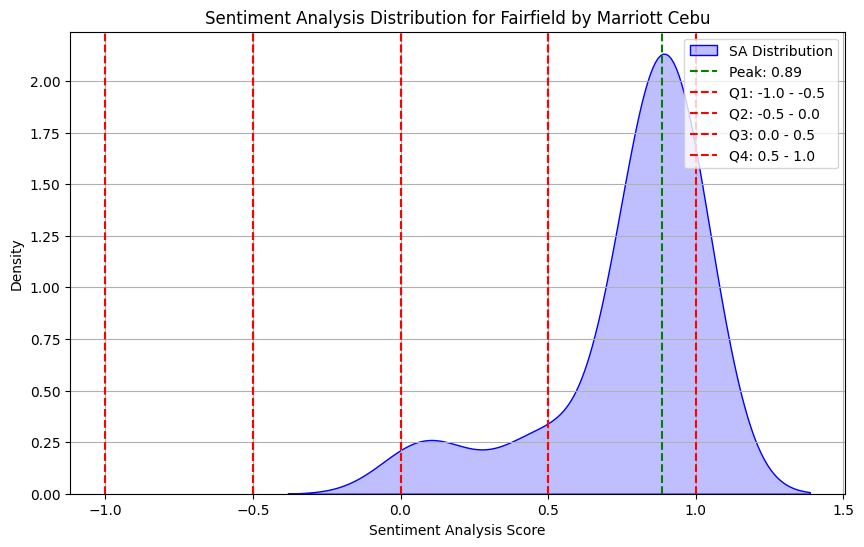

In [19]:
fairfield_by_marriott_cebu_reviews = pd.read_csv(r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\fairfield_by_marriott_cebu_predictions.csv')

# Add a new column 'SA' for Sentiment Analysis score to the dataframe
fairfield_by_marriott_cebu_reviews['SA'] = fairfield_by_marriott_cebu_reviews['predicted_scores'].apply(calculate_sentiment_score)

# Plot KDE and peak for bai Hotel
fairfield_by_marriott_cebu_peak_value = plot_sa_distribution(fairfield_by_marriott_cebu_reviews, 'Fairfield by Marriott Cebu')

# Save the results
save_results("fairfield_by_marriott_cebu", fairfield_by_marriott_cebu_peak_value)

In [20]:
# Define the path for bai_hotel sentiment results
fairfield_by_marriott_cebu = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\3_fairfield_by_marriott_cebu\3_fairfield_by_marriott_cebu_sentiment_analysis.csv"

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(fairfield_by_marriott_cebu )



Sentiment Analysis for 3_fairfield_by_marriott_cebu:
                 positive  negative  positive_percent  negative_percent
food                 27.0       0.0         25.233645          0.000000
staff                51.0       2.0         47.663551          1.869159
comfort              30.0       0.0         28.037383          0.000000
facilities           13.0       0.0         12.149533          0.000000
value for money       3.0       0.0          2.803738          0.000000




# JPark Island Resort and Waterpark KDE & Aspect summary

C:\Users\andyb\AppData\Local\Temp\ipykernel_15672\58313337.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')


c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


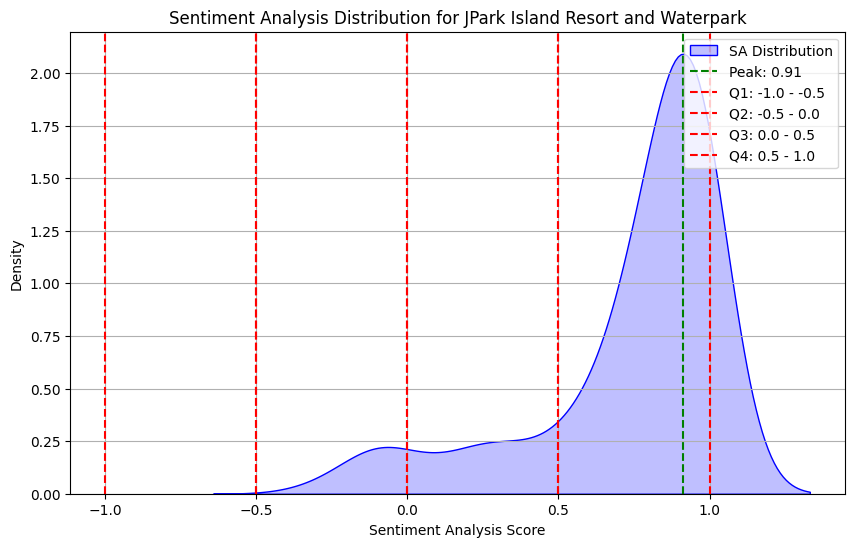

In [21]:
jpark_island_resort_and_waterpark_reviews = pd.read_csv(r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\jpark_island_resort_and_waterpark_predictions.csv')

# Add a new column 'SA' for Sentiment Analysis score to the dataframe
jpark_island_resort_and_waterpark_reviews['SA'] = jpark_island_resort_and_waterpark_reviews['predicted_scores'].apply(calculate_sentiment_score)

# Plot KDE and peak for bai Hotel
jpark_island_resort_and_waterpark_peak_value = plot_sa_distribution(jpark_island_resort_and_waterpark_reviews, 'JPark Island Resort and Waterpark')

# Save the results
save_results("jpark_island_resort_and_waterpark", jpark_island_resort_and_waterpark_peak_value)

In [22]:
# Define the path for bai_hotel sentiment results
jpark_island_resort_and_waterpark = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\4_jpark_island_resort_and_waterpark\4_jpark_island_resort_and_waterpark_sentiment_analysis.csv"

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(jpark_island_resort_and_waterpark)



Sentiment Analysis for 4_jpark_island_resort_and_waterpark:
                 positive  negative  positive_percent  negative_percent
food                114.0       8.0         20.540541          1.441441
staff               162.0      10.0         29.189189          1.801802
comfort              21.0       0.0          3.783784          0.000000
facilities           64.0       5.0         11.531532          0.900901
value for money       4.0       1.0          0.720721          0.180180




# Seda Ayala Center Cebu KDE & Aspect summary

C:\Users\andyb\AppData\Local\Temp\ipykernel_15672\58313337.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


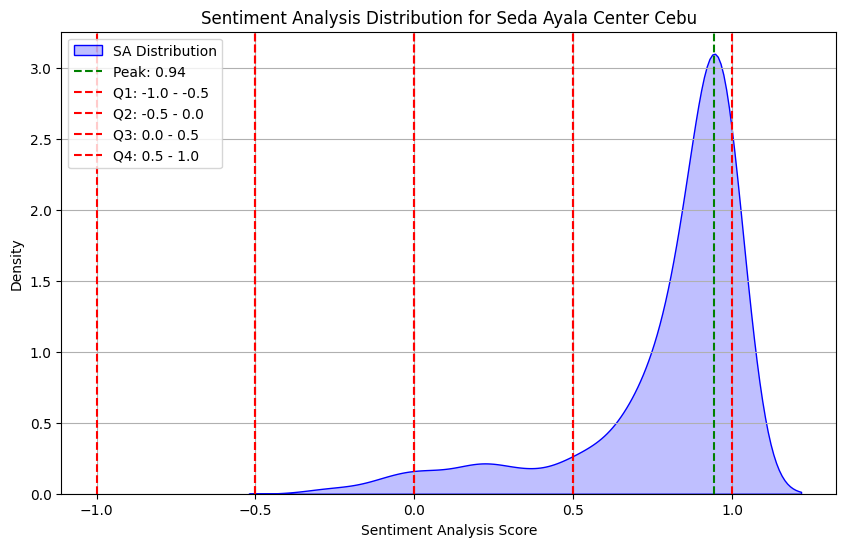

In [23]:
seda_ayala_center_cebu_reviews = pd.read_csv(r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\seda_ayala_center_cebu_predictions.csv')

# Add a new column 'SA' for Sentiment Analysis score to the dataframe
seda_ayala_center_cebu_reviews['SA'] = seda_ayala_center_cebu_reviews['predicted_scores'].apply(calculate_sentiment_score)

# Plot KDE and peak for bai Hotel
seda_ayala_center_cebu_peak_value = plot_sa_distribution(seda_ayala_center_cebu_reviews, 'Seda Ayala Center Cebu')

# Save the results
save_results("seda_ayala_center_cebu", seda_ayala_center_cebu_peak_value)

In [24]:
# Define the path for bai_hotel sentiment results
seda_ayala_center_cebu = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\5_seda_ayala_center_cebu\5_seda_ayala_center_cebu_sentiment_analysis.csv"

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(seda_ayala_center_cebu)



Sentiment Analysis for 5_seda_ayala_center_cebu:
                 positive  negative  positive_percent  negative_percent
food                276.0      11.0         14.038657          0.559512
staff               754.0      27.0         38.351984          1.373347
comfort             157.0       2.0          7.985758          0.101729
facilities           62.0       4.0          3.153611          0.203459
value for money      37.0       0.0          1.881994          0.000000




# Waterfront Hotel and Casino KDE & Aspect summary

C:\Users\andyb\AppData\Local\Temp\ipykernel_15672\58313337.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
c:\Users\andyb\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


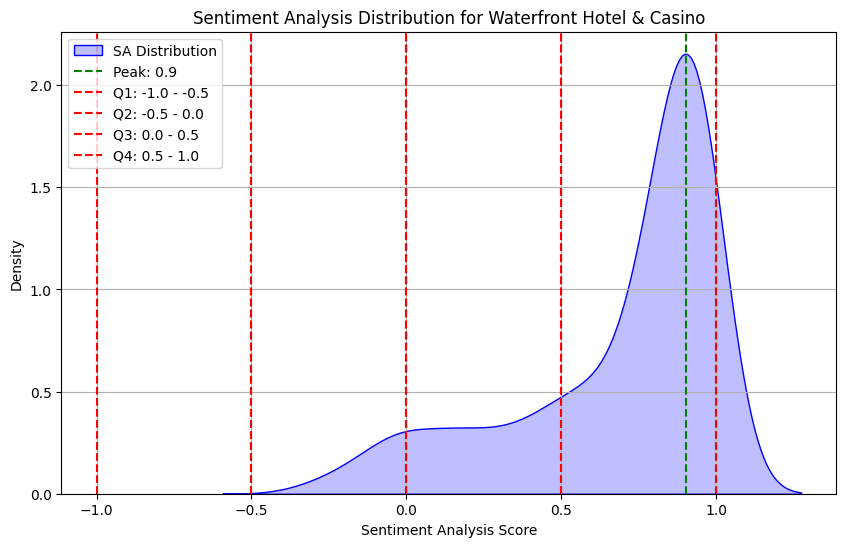

In [25]:
waterfront_hotel_and_casino_reviews = pd.read_csv(r'C:\Users\andyb\Desktop\Coding Files\pointview\sentiment analysis\predictions_by_hotel\waterfront_hotel_and_casino_predictions.csv')

# Add a new column 'SA' for Sentiment Analysis score to the dataframe
waterfront_hotel_and_casino_reviews['SA'] = waterfront_hotel_and_casino_reviews['predicted_scores'].apply(calculate_sentiment_score)

# Plot KDE and peak for bai Hotel
waterfront_hotel_and_casino_peak_value = plot_sa_distribution(waterfront_hotel_and_casino_reviews, 'Waterfront Hotel & Casino')

# Save the results
save_results("seda_ayala_center_cebu", waterfront_hotel_and_casino_peak_value)

In [26]:
# Define the path for bai_hotel sentiment results
waterfront_hotel_and_casino = r"C:\Users\andyb\Desktop\Coding Files\PointView\datasets\sentiment_results\6_waterfront_hotel_and_casino\6_waterfront_hotel_and_casino_sentiment_analysis.csv"

# Call the function to display sentiment results for bai_hotel
load_and_display_sentiment_result(waterfront_hotel_and_casino)



Sentiment Analysis for 6_waterfront_hotel_and_casino:
                 positive  negative  positive_percent  negative_percent
food                199.0      27.0         11.796088          1.600474
staff               448.0      36.0         26.556017          2.133966
comfort              95.0       5.0          5.631298          0.296384
facilities           80.0       7.0          4.742146          0.414938
value for money      24.0       1.0          1.422644          0.059277


